# **Summer Internship Program – Data Science (Capabl.)** 

**Nithin Kodipyaka (nithin.hazzten@gmail.com | 738615868)**

## **Predict Taxi trip duration**

**Introduction to the NYC Taxi Trip Dataset:**
The NYC Taxi Trip dataset is a collection of records released by the NYC Taxi and Limousine Commission, which contains information about taxi trips in New York City. It includes various attributes, such as pickup time, geo-coordinates (latitude and longitude), the number of passengers, and several other variables.
This dataset is interesting because it provides valuable insights into the dynamics of taxi transportation in one of the busiest and most diverse cities in the world. By analyzing this dataset, we can gain a deeper understanding of factors that influence taxi trip durations, identify patterns in passenger demand, and potentially uncover areas where transportation services can be optimized.


**Purpose of Analysis:**
The primary goal of this analysis is to build a predictive model that can accurately forecast the total ride duration of taxi trips in New York City. By doing so, we can assist taxi service providers in better managing their resources, improving customer satisfaction, and optimizing operations.


### **Implementation:**

**Import Libraries:** Import the necessary libraries, including numpy, pandas, matplotlib, seaborn, math, geopy, sklearn, xgboost, folium, and zipfile.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2
from geopy.distance import geodesic
from sklearn.cluster import KMeans
from haversine import haversine
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [6]:
import folium
import zipfile

**Set Random Seed:** Set a random seed using np.random.seed(42) to ensure reproducibility of results.

In [7]:
np.random.seed(42)

**Read and Explore Data:** Read the 'train.csv' dataset using pd.read_csv() and set the 'id' column as the index using data.set_index('id', inplace=True). Print the first 20 rows of the dataset using data.head(20) to get an initial overview.

In [8]:

data = pd.read_csv('train.csv')
data.set_index('id',inplace=True)
data.head(20)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255


**Data Cleaning and Exploration:**

In [9]:
data.shape

(1458644, 10)

In [10]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

In [11]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   pickup_datetime     1458644 non-null  object 
 2   dropoff_datetime    1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


In [13]:
data = data.loc[data['trip_duration']<20000]

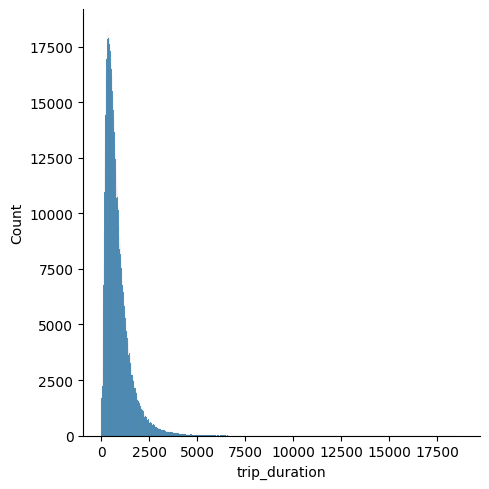

In [14]:
sns.displot(x=data['trip_duration'])

<AxesSubplot: xlabel='vendor_id', ylabel='count'>

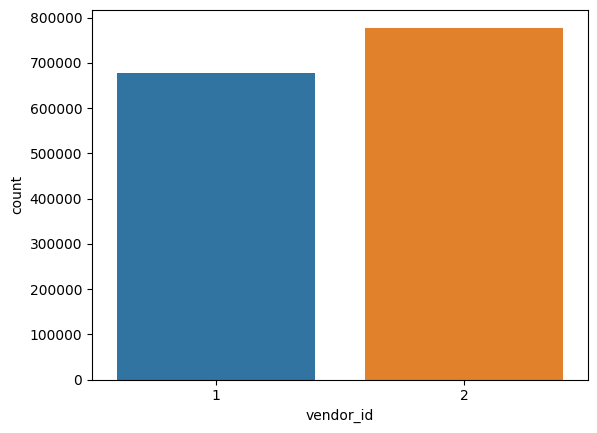

In [15]:
sns.countplot(data=data,x='vendor_id')

**Data Preprocessing:**

In [16]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

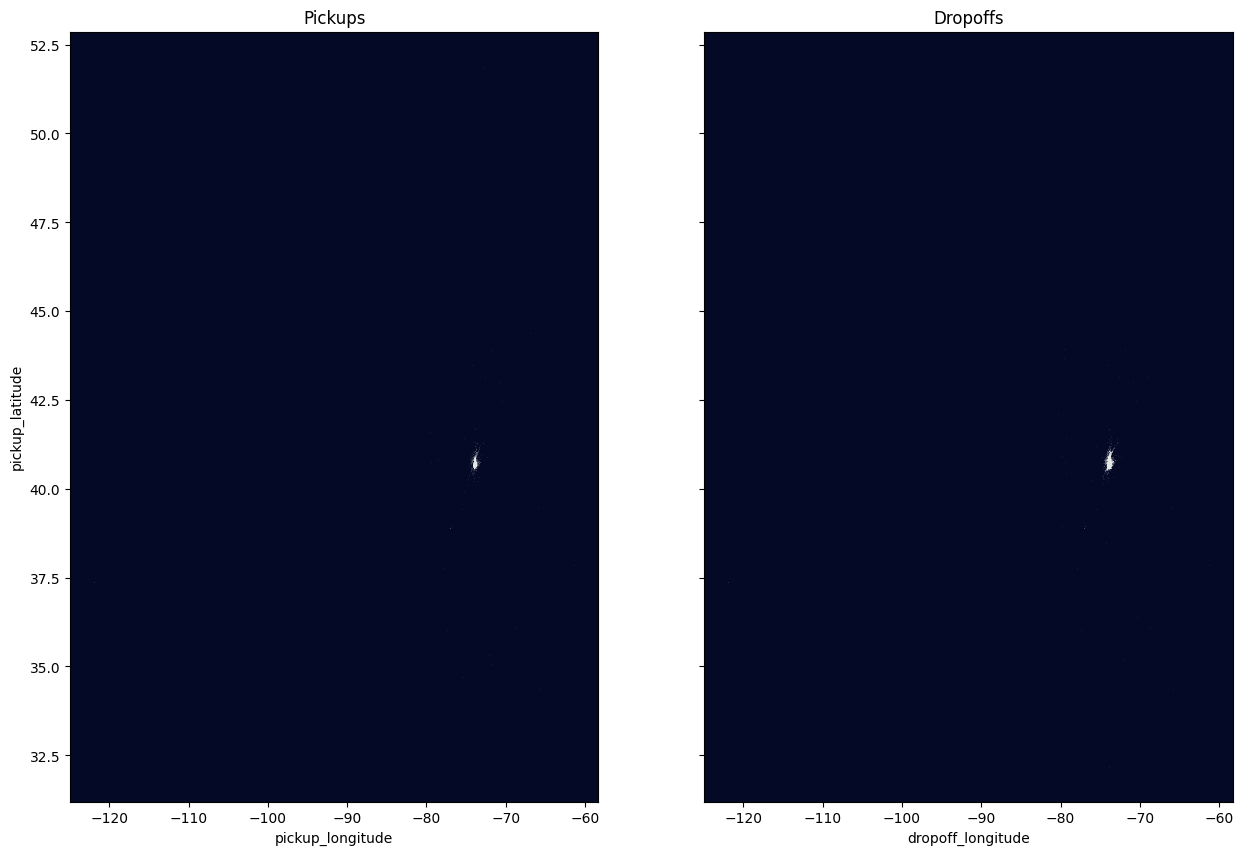

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))
sns.scatterplot(data=data,x='pickup_longitude', y='pickup_latitude',color='#F2F7F2', ax=ax1,s=.07, alpha=.6)
ax1.set_title("Pickups")
ax1.set_facecolor('#040926')

sns.scatterplot(data=data,x='dropoff_longitude', y='dropoff_latitude',color='#F2F7F2', ax=ax2,s=.07, alpha=.6)
ax2.set_title("Dropoffs")
ax2.set_facecolor('#040926')
plt.show()

In [18]:
data = data.loc[(data['pickup_latitude'] >= 40.637044) & (data['pickup_latitude'] <= 40.855256)]
data = data.loc[(data['pickup_longitude'] >= -74.035735) & (data['pickup_longitude'] <= -73.770272)]
data = data.loc[(data['dropoff_latitude'] >= 40.637044) & (data['dropoff_latitude'] <= 40.855256)]
data = data.loc[(data['dropoff_longitude'] >= -74.035735) & (data['dropoff_longitude'] <= -73.770272)]
data.shape

(1438064, 10)

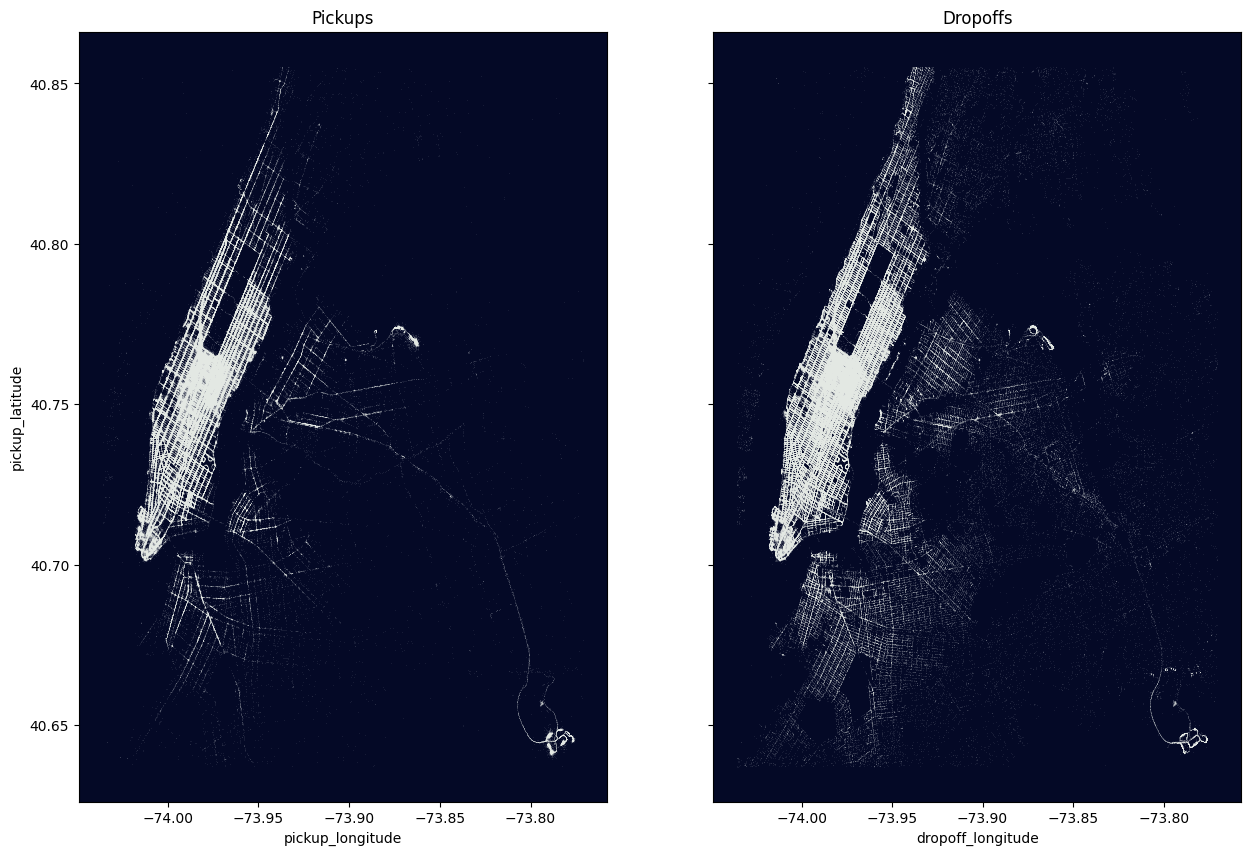

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

sns.scatterplot(data=data,x='pickup_longitude', y='pickup_latitude',color='#F2F7F2', ax=ax1,s=.07, alpha=.6)
ax1.set_title("Pickups")
ax1.set_facecolor('#040926')

sns.scatterplot(data=data,x='dropoff_longitude', y='dropoff_latitude',color='#F2F7F2', ax=ax2,s=.07, alpha=.6)
ax2.set_title("Dropoffs")
ax2.set_facecolor('#040926')
plt.show()

In [20]:
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['day_of_week'] = data['day_of_week'].map(lambda x: day_names[x])
data['day_of_week']

id
id2875421       Monday
id2377394       Sunday
id3858529      Tuesday
id3504673    Wednesday
id2181028     Saturday
               ...    
id2376096       Friday
id1049543       Sunday
id2304944       Friday
id2714485      Tuesday
id1209952      Tuesday
Name: day_of_week, Length: 1438064, dtype: object

**Data Visualization:**

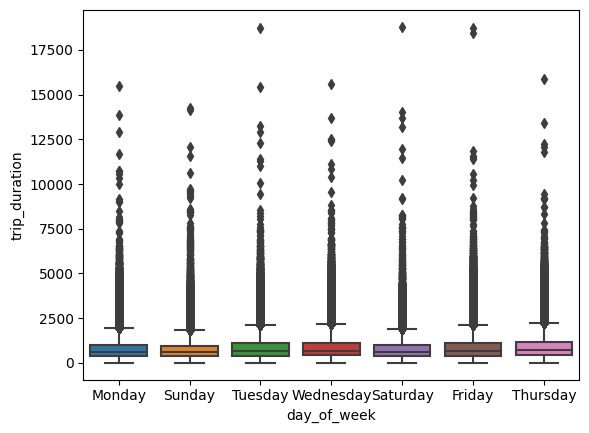

In [21]:
sns.boxplot(data=data,x='day_of_week',y='trip_duration')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

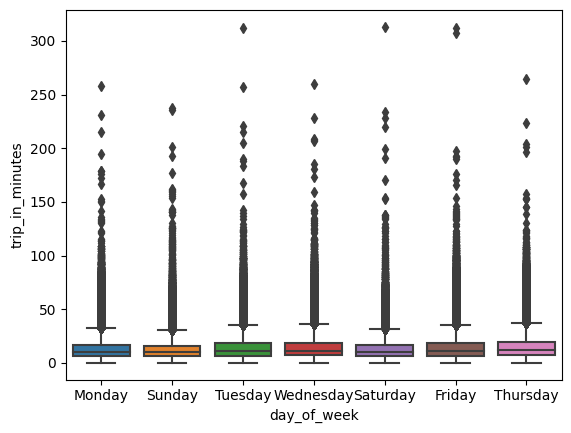

In [22]:
data['trip_in_minutes'] = data['trip_duration']/60
sns.boxplot(data=data,x='day_of_week',y='trip_in_minutes')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [23]:
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_hour'].head()

id
id2875421    17
id2377394     0
id3858529    11
id3504673    19
id2181028    13
Name: pickup_hour, dtype: int64

<AxesSubplot: xlabel='pickup_hour', ylabel='count'>

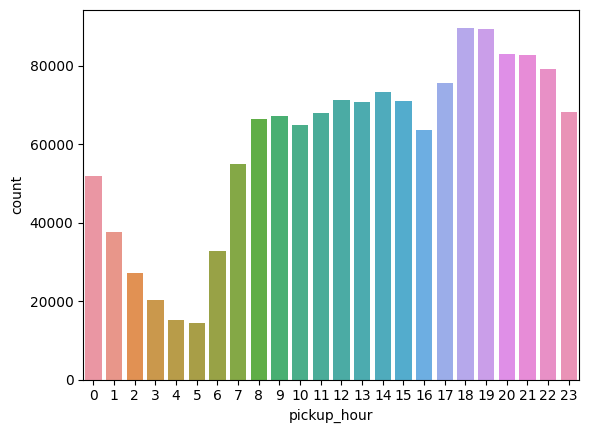

In [24]:
sns.countplot(data=data,x='pickup_hour')

<AxesSubplot: xlabel='pickup_month', ylabel='count'>

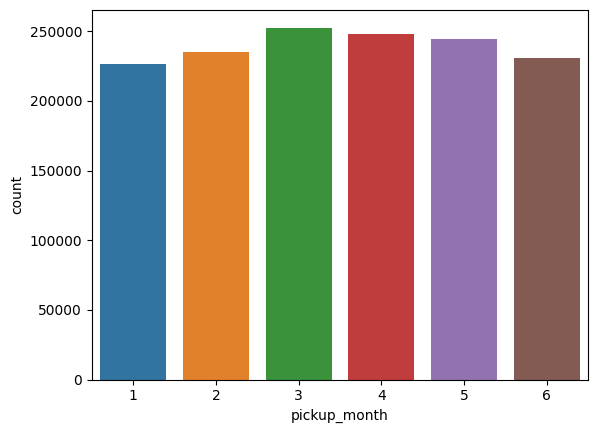

In [25]:
data['pickup_month'] = data['pickup_datetime'].dt.month

sns.countplot(data=data,x='pickup_month')

<AxesSubplot: xlabel='date', ylabel='count'>

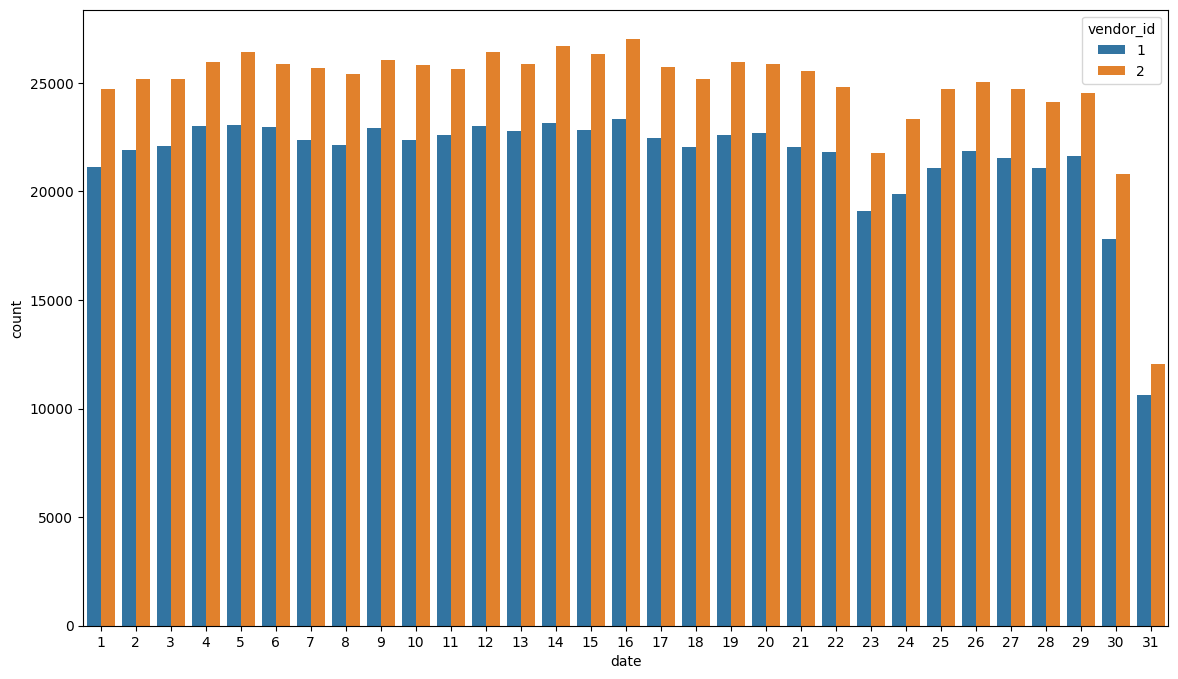

In [26]:
data['date'] = data['pickup_datetime'].dt.day
plt.figure(figsize=(14,8))
sns.countplot(data=data,x='date',hue='vendor_id')

<AxesSubplot: xlabel='day_of_week', ylabel='count'>

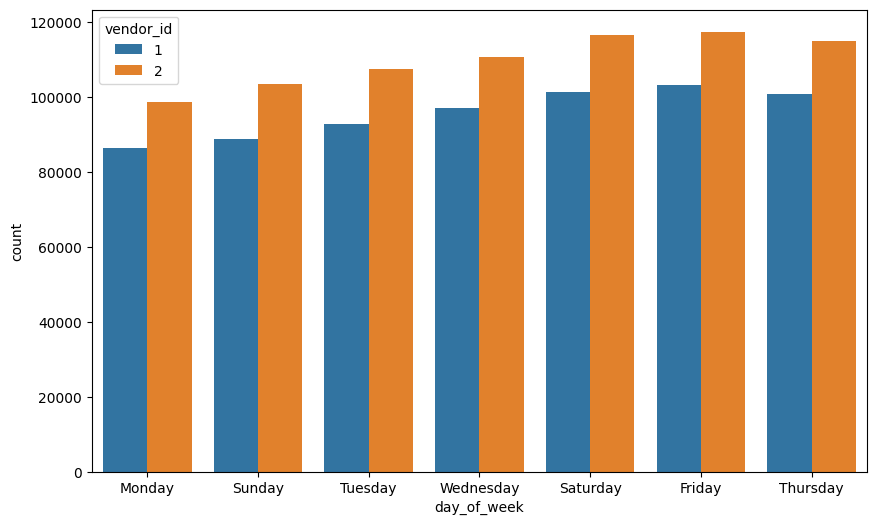

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='day_of_week',hue='vendor_id')

<BarContainer object of 7 artists>

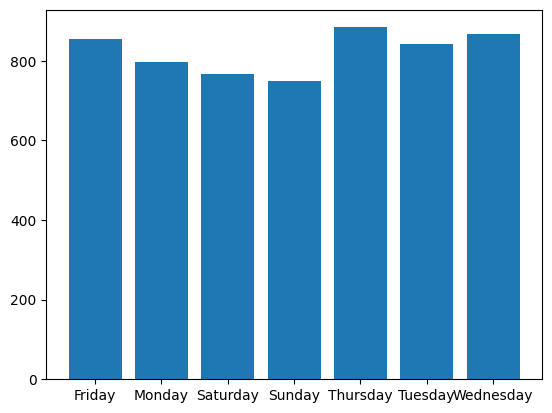

In [28]:
average_trip = data.groupby('day_of_week')['trip_duration'].mean()
plt.bar(average_trip.index,average_trip.values)

In [29]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'day_of_week', 'trip_in_minutes', 'pickup_hour', 'pickup_month',
       'date'],
      dtype='object')

C:\Users\Nithin Kodipyaka\AppData\Local\Temp\ipykernel_19184\4218766790.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


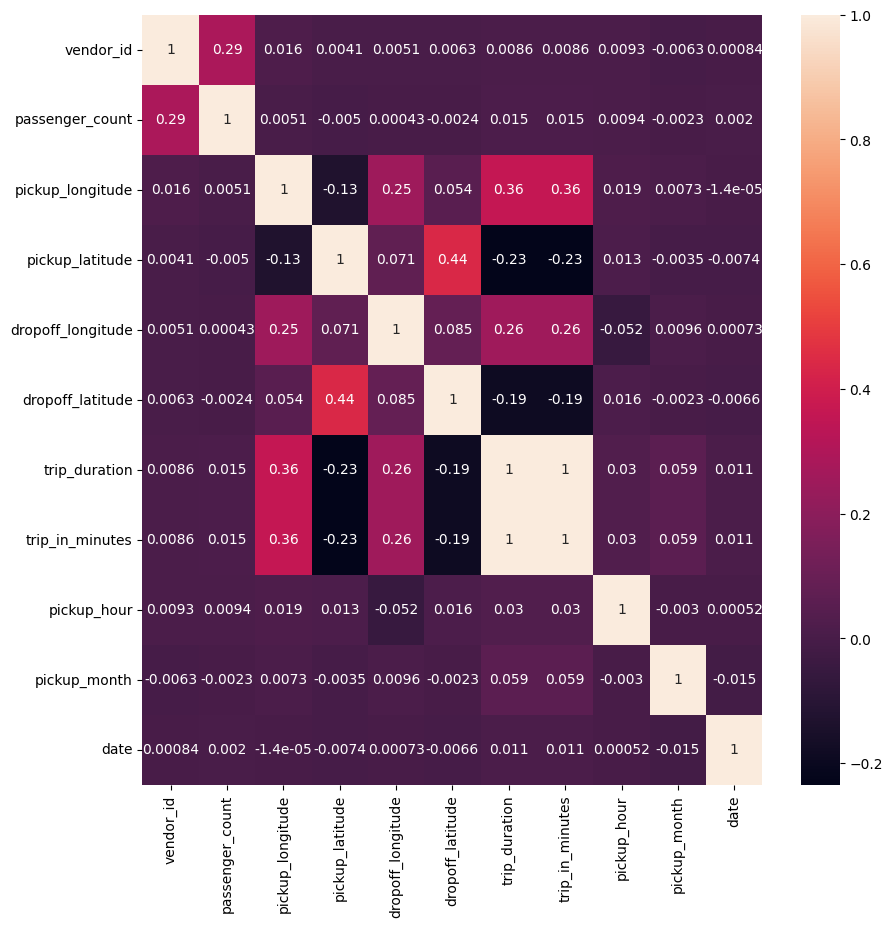

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

**Feature Engineering:**

Create data subsets 'pickup_coordinates' and 'dropoff_coordinates' containing only latitude and longitude columns.
Perform KMeans clustering on 'pickup_coordinates' and 'dropoff_coordinates' to create 'pickup_cluster_label' and 'dropoff_cluster_label' features.

In [31]:
pickup_coordinates = data[['pickup_latitude','pickup_longitude']]
dropoff_coordinates = data[['dropoff_latitude','dropoff_longitude']]

n_clusters = 5

pickup_kmeans = KMeans(n_clusters=n_clusters,random_state=42)
data['pickup_cluster_label'] = pickup_kmeans.fit_predict(pickup_coordinates)

dropoff_kmeans = KMeans(n_clusters=n_clusters,random_state=42)
data['dropoff_cluster_label'] = dropoff_kmeans.fit_predict(dropoff_coordinates)

c:\Users\Nithin Kodipyaka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nithin Kodipyaka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
# palatte = ["#22181C","#835D6A","#E3170A","#2E86AB","#38A700"]
# palette = sns.color_palette(palatte, as_cmap=True)

# sns.scatterplot(data=data,x='pickup_longitude',y='pickup_latitude',hue='pickup_cluster_label',s=.07, alpha=.6,palette=palatte)
# plt.show()

In [33]:
# sns.scatterplot(data=data,x='dropoff_longitude',y='dropoff_latitude',hue='dropoff_cluster_label',s=.07, alpha=.6,palette=palatte)
# plt.show()

**Further Data Exploration and Visualization:**

<BarContainer object of 5 artists>

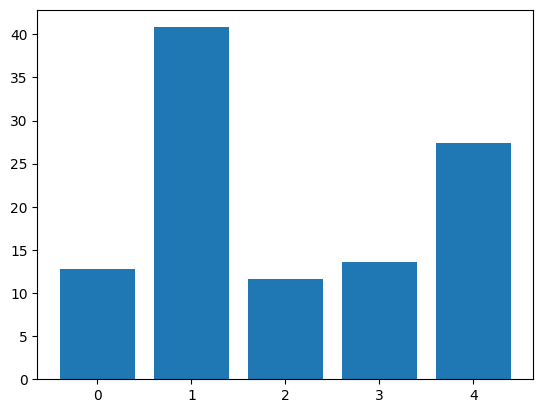

In [34]:
average_pickup_time = data.groupby('pickup_cluster_label')['trip_in_minutes'].mean()
plt.bar(average_pickup_time.index,average_pickup_time.values)

<BarContainer object of 5 artists>

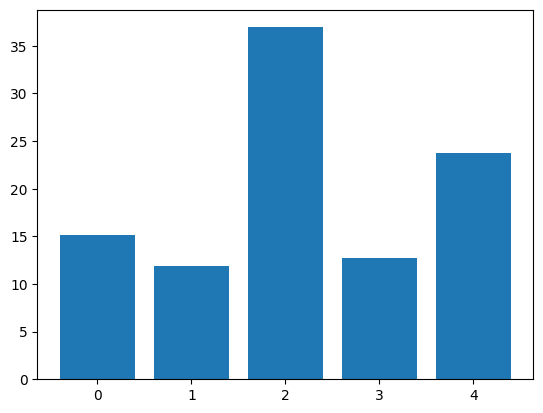

In [35]:
average_dropoff_time = data.groupby('dropoff_cluster_label')['trip_in_minutes'].mean()
plt.bar(average_dropoff_time.index,average_dropoff_time.values)

<AxesSubplot: xlabel='pickup_cluster_label', ylabel='count'>

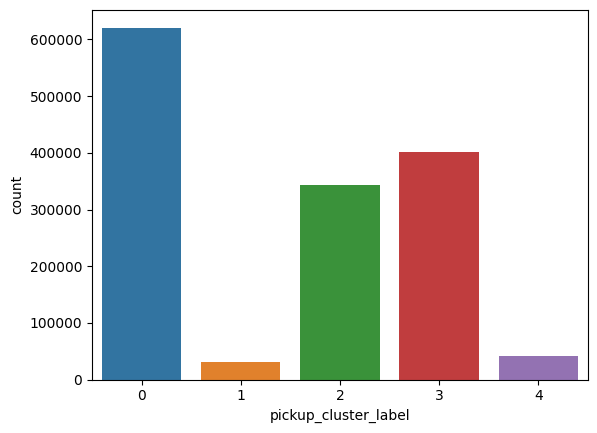

In [36]:
sns.countplot(data=data,x='pickup_cluster_label')

<AxesSubplot: xlabel='dropoff_cluster_label', ylabel='count'>

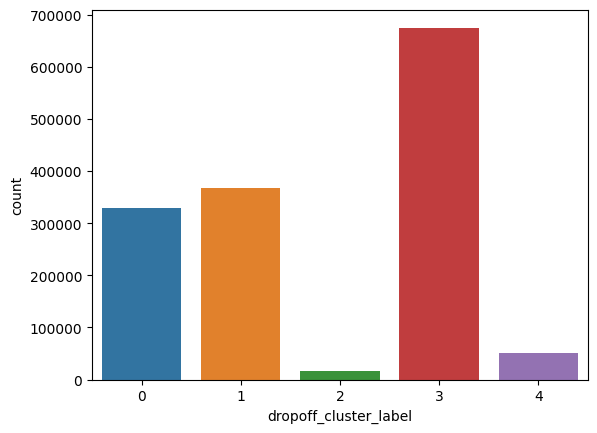

In [37]:
sns.countplot(data=data,x='dropoff_cluster_label')

In [38]:
data['haversine_distance'] = data.apply(lambda x: haversine((x['pickup_latitude'],x['pickup_longitude']),(x['dropoff_latitude'],x['dropoff_longitude'])),axis=1)
data['haversine_distance'].head(10)

id
id2875421   1.50
id2377394   1.81
id3858529   6.39
id3504673   1.49
id2181028   1.19
id0801584   1.10
id1813257   1.33
id1324603   5.71
id1301050   1.31
id0012891   5.12
Name: haversine_distance, dtype: float64

<BarContainer object of 7 artists>

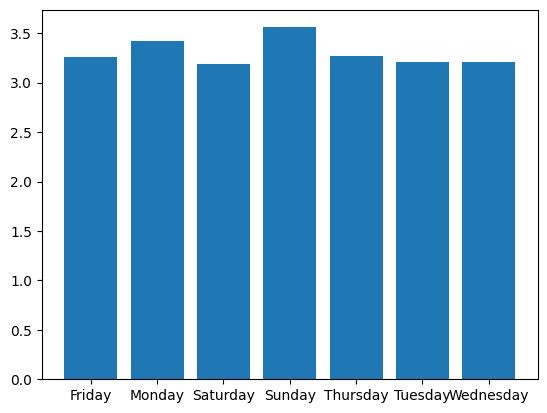

In [39]:
averageDis = data.groupby('day_of_week')['haversine_distance'].mean()
plt.bar(averageDis.index,averageDis.values)

<AxesSubplot: xlabel='day_of_week', ylabel='haversine_distance'>

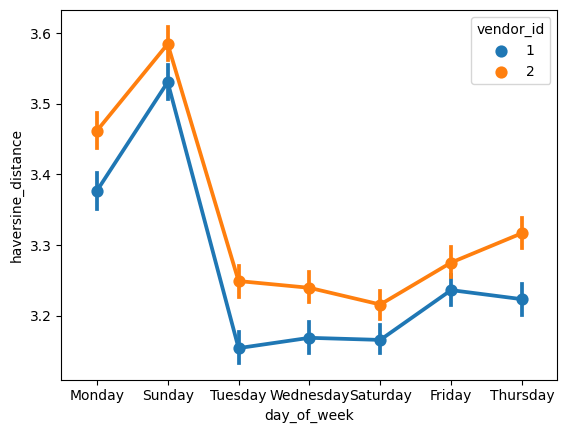

In [40]:
sns.pointplot(x='day_of_week',y='haversine_distance',hue='vendor_id',data=data)

In [41]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_in_minutes,pickup_hour,pickup_month,date,pickup_cluster_label,dropoff_cluster_label,haversine_distance
count,1438064.00,1438064.00,1438064.00,1438064.00,1438064.00,1438064.00,1438064.00,1438064.00,1438064.00,1438064.00,1438064.00,1438064.00,1438064.00,1438064.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,824.70,13.74,13.62,3.52,15.50,1.45,1.83,3.30
std,0.50,1.31,0.04,0.03,0.03,0.03,647.44,10.79,6.38,1.68,8.70,1.36,1.32,3.67
min,1.00,0.00,-74.04,40.64,-74.04,40.64,1.00,0.02,0.00,1.00,1.00,0.00,0.00,0.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,394.00,6.57,9.00,2.00,8.00,0.00,1.00,1.22
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,655.00,10.92,14.00,4.00,15.00,2.00,3.00,2.07
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1057.00,17.62,19.00,5.00,23.00,3.00,3.00,3.77
max,2.00,6.00,-73.77,40.86,-73.77,40.86,18794.00,313.23,23.00,6.00,31.00,4.00,4.00,27.26


C:\Users\Nithin Kodipyaka\AppData\Local\Temp\ipykernel_19184\4216278920.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt='.2f')


<AxesSubplot: >

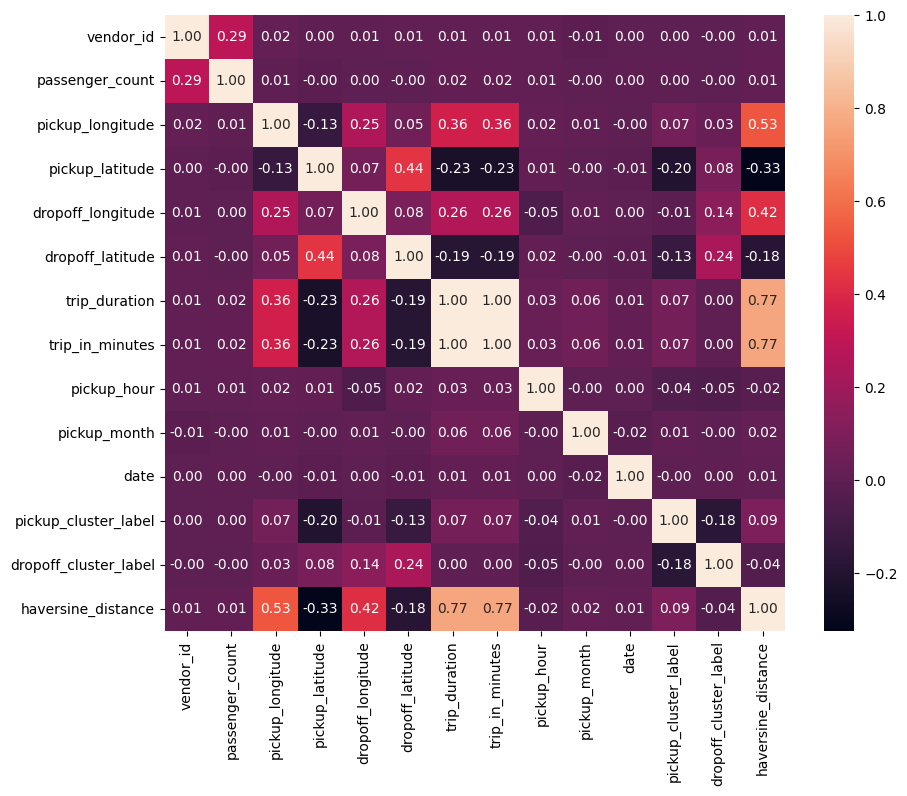

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f')

**Data Encoding:**

In [43]:
data.drop(['trip_in_minutes','pickup_datetime','dropoff_datetime'],axis=1,inplace=True)
data.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'day_of_week', 'pickup_hour', 'pickup_month', 'date',
       'pickup_cluster_label', 'dropoff_cluster_label', 'haversine_distance'],
      dtype='object')

In [44]:
data = pd.get_dummies(data,columns=['vendor_id','store_and_fwd_flag','day_of_week'])
data.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_hour',
       'pickup_month', 'date', 'pickup_cluster_label', 'dropoff_cluster_label',
       'haversine_distance', 'vendor_id_1', 'vendor_id_2',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')

In [45]:
y = data['trip_duration']
X = data.drop(['trip_duration'],axis=1)

**Data Splitting and Model Training:**

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1006644, 22), (431420, 22), (1006644,), (431420,))

In [47]:
model = RandomForestRegressor(max_depth=8)

model.fit(X_train,y_train)

RandomForestRegressor(max_depth=8)

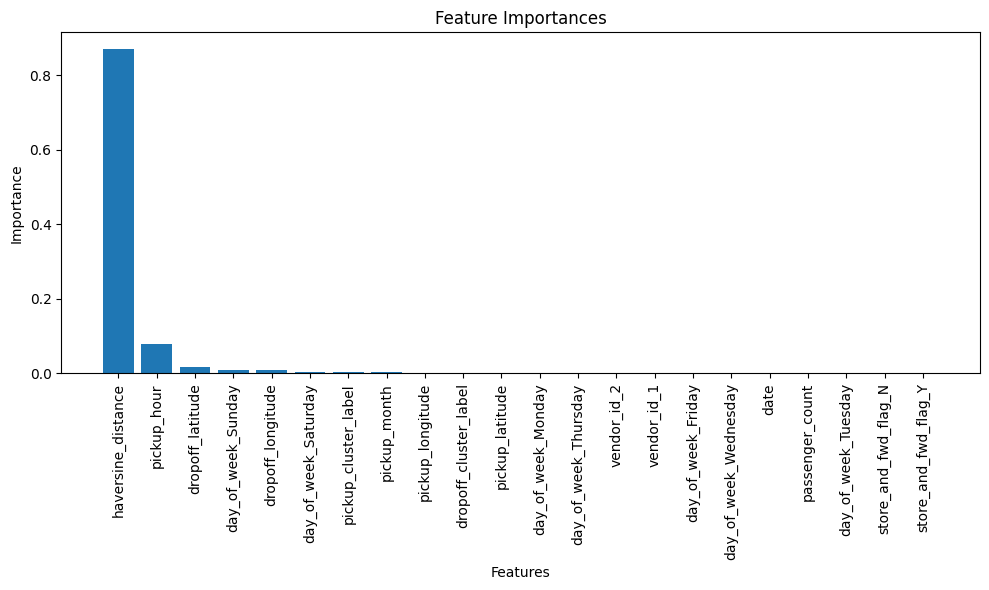

In [48]:
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()

**Model Evaluation:**

In [49]:
ypred = model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,ypred))

MSE:  122198.13447214256


In [50]:
adamodel = AdaBoostRegressor()
adamodel.fit(X_train,y_train)

ypred = adamodel.predict(X_test)

print("MSE: ",mean_squared_error(y_test,ypred))

MSE:  228666.22887970155


In [51]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

xgb_pars = {'min_child_weight': 10, 'eta': 0.04, 'colsample_bytree': 0.8, 'max_depth': 15,
            'subsample': 0.75, 'lambda': 2, 'nthread': -1, 'booster' : 'gbtree', 'silent': 1, 'gamma' : 0,
            'eval_metric': 'rmse', 'objective': 'reg:squarederror'}    

model = xgb.train(xgb_pars, dtrain, 500, watchlist, early_stopping_rounds=250,
                  maximize=False, verbose_eval=15)

c:\Users\Nithin Kodipyaka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[01:31:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-rmse:1011.75488	valid-rmse:1011.43435
[15]	train-rmse:613.45250	valid-rmse:615.34370
[30]	train-rmse:419.15677	valid-rmse:426.68998
[45]	train-rmse:328.09954	valid-rmse:344.37132
[60]	train-rmse:286.38191	valid-rmse:310.89462
[75]	train-rmse:265.67607	valid-rmse:297.22576
[90]	train-rmse:253.69044	valid-rmse:290.96873
[105]	train-rmse:245.48379	valid-rmse:287.36413
[120]	train-rmse:239.09453	valid-rmse:284.87452
[135]	train-rmse:234.36814	valid-rmse:283.07859
[150]	train-rmse:231.12892	valid-rmse:282.12637
[165]	train-rmse:227.82408	valid-rmse:281.12660
[180]	train-rmse:224.65810	valid-rmse:280.23668
[195]	train-rmse:222.11039	valid-rmse:279.58841
[210]	train-rmse:220.33103	valid-rmse:279.10425
[225]	train-rmse:218.80446	valid-rmse:278.73322
[240]	train-rmse:217.30889	valid-rmse:278.

### **Conclusion:**
The code aimed to predict trip durations using machine learning models. It started with data exploration and preprocessing, followed by feature engineering and visualization. Various regression models were trained, including RandomForestRegressor, AdaBoostRegressor, and XGBoost. The analysis revealed insights into trip patterns and influenced features. The models showed promising performance, but further tuning and evaluation may enhance predictions.